Занятие 2. Предварительный анализ данных. Визуализация данных.
=======

Полезные ссылки:
* https://pandas.pydata.org/pandas-docs/stable/visualization.html
* http://matplotlib.org/gallery.html

Швейцарские банкноты
-----
Будем работать с данными из файла ```swiss_bank_notes.csv```, в которых находится информация о поддельных и настоящих купюрах, а именно -- размерах банкнот. Хотим попробовать "на глаз", без применения методов машинного обучения попробовать отличить фальшивые купюры от настоящих.

Начнём с чтения данных. Метод ```pandas.read_csv``` читает данные из текстового файла с разделителем (т.н. csv-файлы, comma-separated values) в объект DataFrame.

Полезные параметры:
* ```sep``` -- задаёт символ-разделитель полей в файле (по умолчанию разделитель запятая);
* ```names``` -- список названий колонок, если он не задан в файле;
* ```index_col``` -- номер колонки с индексом.
* ```decimal``` -- символ-разделитель для знаков после запятой.

Пара слов об аргументах функций.
Аргументы бывают именованные (задано имя аргумента) или позиционные (имя аргумента не задано).
Здесь ```swiss_bank_notes.csv``` -- позиционный аргумент, имя файла. ```index_col=0``` -- именованный аргумент. При вызове функции именованные аргументы обязаны следовать после позиционных.

Кроме этого, pandas поддерживает чтение большинства распространённых форматов данных, в частности Excel.

In [8]:
import os
os.chdir("E:\видео уроки\Анализ данных\Computer Science Center\Shad_Python_01_2_2")

import pandas as pd


df = pd.read_csv('swiss_bank_notes.csv', index_col=0)

Убедимся, что с самими данными всё хорошо, да и вообще данные прочитались нормально. Используем метод ```DataFrame.head```, который выводит первые n строк таблицы (по умолчанию 5).

In [9]:
df.head()

,Status,Length,Left,Right,Bottom,Top,Diagonal
1,genuine,214.8,131.0,131.1,9.0,9.7,141.0
2,genuine,214.6,129.7,129.7,8.1,9.5,141.7
3,genuine,214.8,129.7,129.7,8.7,9.6,142.2
4,genuine,214.8,129.7,129.6,7.5,10.4,142.0
5,genuine,215.0,129.6,129.7,10.4,7.7,141.8


Также посмотрим, какова размерность данных. Для этого есть атрибут DataFrame.shape. Информацию о количестве строк требуется знать чаще. Для этого можно применить уже знакомую функцию len.

In [11]:
print(df.shape)
print(len(df))

(200, 7)
200


Посмотрим на типы данных.

In [12]:
df.dtypes

Status       object
Length      float64
Left        float64
Right       float64
Bottom      float64
Top         float64
Diagonal    float64
dtype: object

После того, как убедились, что данные считались корректно, хочется сделать их быстрый обзор. Для этого есть метод ```DataFrame.describe```, который для всех численных колонок выводит:
* count -- число значений колонок без NA-значений (NA -- not available, т.е. без пропусков),
* mean -- среднее значение колонки,
* std -- стандартное отклонение,
* min, max -- наибольшее и наименьшее значение,
* 25%, 50%, 75% -- перцентили.

In [13]:
df.describe()

,Length,Left,Right,Bottom,Top,Diagonal
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,214.896000,130.121500,129.956500,9.417500,10.650500,140.483500
std,0.376554,0.361026,0.404072,1.444603,0.802947,1.152266
min,213.800000,129.000000,129.000000,7.200000,7.700000,137.800000
25%,214.600000,129.900000,129.700000,8.200000,10.100000,139.500000
50%,214.900000,130.200000,130.000000,9.100000,10.600000,140.450000
75%,215.100000,130.400000,130.225000,10.600000,11.200000,141.500000
max,216.300000,131.000000,131.100000,12.700000,12.300000,142.400000


Для строковой колонки ```Status``` можно вывести распределение статусов с помощью метода ```Series.value_counts```.

In [14]:
df['Status'].value_counts()

genuine        100
counterfeit    100
Name: Status, dtype: int64

Перцентили -- хорошо, но они дают не полную картину о распределении данных. Построим гистограммы для каждого измерения с помощью метода ```Series.hist```. Для этого нужно предварительно импортировать библиотеки ```matplotlib``` и ```matplotlib.pyplot```.

In [15]:
import matplotlib
import matplotlib.pyplot as plt

# выбор темы картинок на мой вкус. Необязательная строчка.
matplotlib.style.use('ggplot')
# Эта строчка нужна для того, чтобы картинки отображались в ячейках
%matplotlib inline

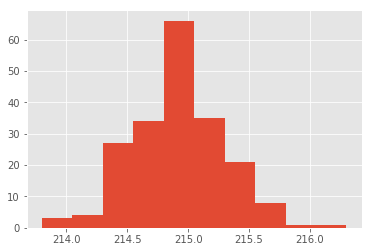

In [16]:
# Наконец, строим обещанную гистограмму для колонки Length.
df['Length'].hist();

По оси y находится количество строчек, у которых ```Length``` попала в данный столбик. Это не всегда удобно, и хочется смотреть на долю столбика от всех имеющихся данных. Специальной функции для этого нет, так что приходится использовать такой хак. Для каждой строчки нужно задать вес, равный числу, обратному длине рассматриваемого вектора.

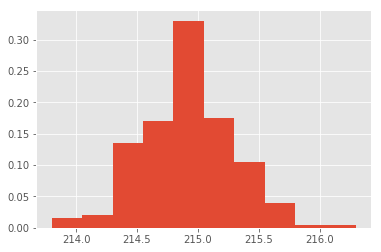

In [17]:
# Задаём список из 200 элементов, каждый из которых равен 1/200.
w = [1. / len(df)]*len(df)
# Передаём этот список функции hist как значение аргумента weights.
df['Length'].hist(weights=w);

Ещё данная гистограмма не устраивает нас тем, что она визуализирует смешанные данные по обоим классам ```counterfeit``` и ```genuine```. Хотелось бы, чтобы на гистограмме было видно разницу в распределении по этим классам.

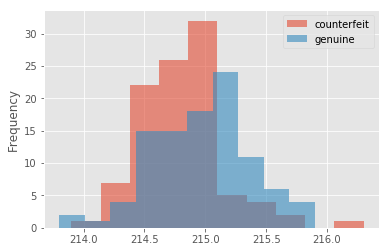

In [18]:
# По идее, вызов должен быть такой: df.groupby('Status')['Length'].hist(alpha=0.6)
# Но из-за бага https://github.com/pandas-dev/pandas/issues/10756
# приходится делать дополнительный вызов plot
df.groupby('Status')['Length'].plot.hist(alpha=0.6)
# Добавляем легенду
plt.legend();

Картинка красивая, но нисколько не отвечает на главный вопрос. Разницы в распределении между фальшивыми и настоящими купюрами практически нет. Но это мы построили распределения только одного фактора. Можно построить аналогичным образом гистограммы и для остальных факторов. Но если колонок не очень много (а у нас их действительно не много), можно построить такую картинку, после которой всё станет ясно со всеми распределениями сразу.

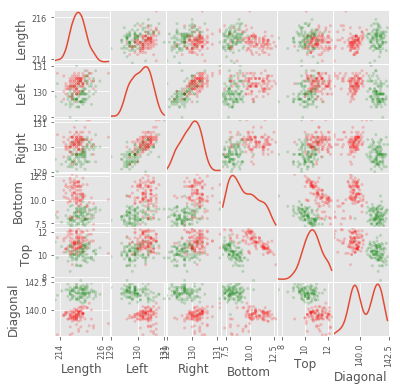

In [19]:
from pandas.plotting import scatter_matrix
colors = {'genuine': 'green', 'counterfeit': 'red'}
scatter_matrix(df,
               # размер картинки
               figsize=(6, 6),
               # плотность вместо гистограммы на диагонали
               diagonal='kde',
               # цвета классов
               c=df['Status'].replace(colors),
               # степень прозрачности точек
               alpha=0.2,
              );

Теперь ясно, что в распределении диагоналей купюр наблюдается очевидное смешение двух нормальных распределений. Теперь, построим гистограммы этого фактора для двух классов купюр, и дело прояснится.

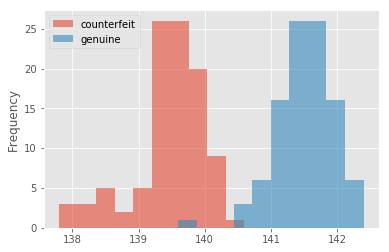

In [20]:
df.groupby('Status')['Diagonal'].plot.hist(alpha=0.6)
plt.legend(loc='upper left')

Можно построить отдельные диаграммы рассеивания, например, для пары признаков ```Top``` и ```Bottom```.

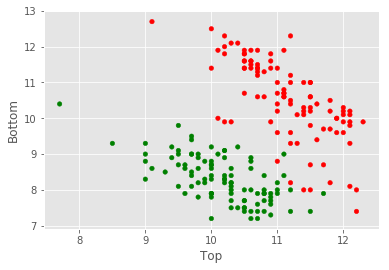

In [21]:
df.plot.scatter(x='Top', y='Bottom', c=df['Status'].replace(colors))